In [1]:
#Import libraries
import cdt
from cdt import SETTINGS
SETTINGS.verbose=False
SETTINGS.NJOBS=16
import networkx as nx
import time
# A warning on R libraries might occur. It is for the use of the r libraries that could be imported into the framework
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

e:\AnaConda\envs\python-3.8\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
No GPU automatically detected. Setting SETTINGS.GPU to 0, and SETTINGS.NJOBS to cpu_count.


In [2]:


import networkx as nx
from cdt.causality.graph import SAM
from cdt.data import load_dataset
from cdt.independence.graph import LinearSVRL2
name="recording_10-08_41_overtake_behind.json"
json_file_path = 'npy_files/recording_10-08_41_overtake_behind.json'
data = pd.read_json(json_file_path)
data = pd.DataFrame(data)
data = data.sample(n=100000, random_state=42)
print(data.shape)



(100000, 11)


In [3]:
obj = SAM(train_epochs=10,test_epochs=1,batch_size=1000)
#The predict() method works without a graph, or with a
#directed or undirected graph provided as an input
ograph = obj.predict(data)    #No graph provided as an argument
import torch  
import joblib   

import pickle
mode_path='model_B'+name+'.pkl'
# 保存模型
with open(mode_path, 'wb') as file:
    pickle.dump(obj, file)


100%|██████████| 11/11 [10:48<00:00, 58.96s/it, disc=0.541, gen=-.321, regul_loss=0.0107, tot=-3.51]


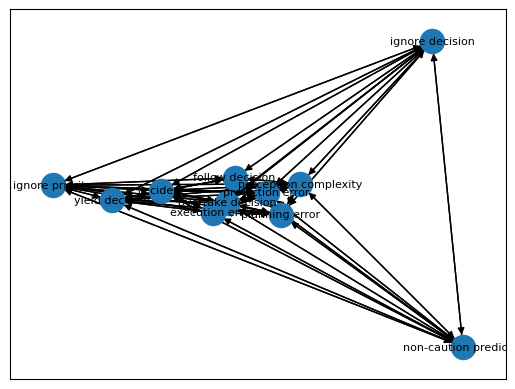

                     Cause                 Effect      Score
0    perception complexity        ignore priority  38.091122
1    perception complexity  non-caution predictor  39.220516
2    perception complexity       prediction error  61.923473
3    perception complexity        ignore decision  52.244541
4    perception complexity        follow decision  34.767914
..                     ...                    ...        ...
105               accident        follow decision  32.607822
106               accident         yield decision  29.147667
107               accident      overtake decision  35.595482
108               accident         planning error  41.994926
109               accident        execution error  33.180805

[110 rows x 3 columns]


In [5]:
# 加载模型
# with open("model1.pkl", 'rb') as file:
#     loaded_obj = pickle.load(file)
# with open('model_B'+name+'.pkl', 'rb') as file:
#     loaded_obj = pickle.load(file)
#To view the graph created, run the below commands:

nx.draw_networkx(ograph, font_size=8)

plt.show()
df = pd.DataFrame(list(ograph.edges(data='weight')), columns=['Cause', 'Effect', 'Score'])
print(df)
df.to_csv('E:\homework\desktop\hw\CS280-作业\project\\results_SAM\\'+'SAM_'+name+'.csv')

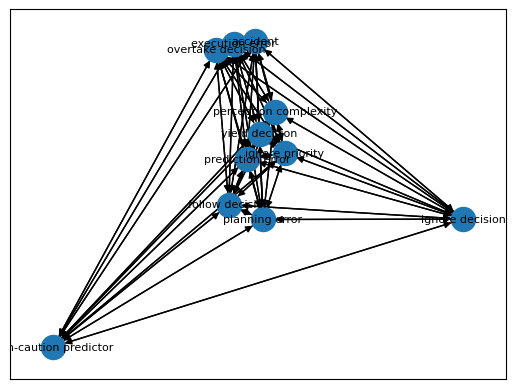

                     Cause                 Effect      Score
0    perception complexity        ignore priority  42.895599
1    perception complexity  non-caution predictor  16.099316
2    perception complexity       prediction error  71.624229
3    perception complexity        ignore decision  22.326660
4    perception complexity        follow decision  34.730183
..                     ...                    ...        ...
105               accident        follow decision  47.431644
106               accident         yield decision  35.802010
107               accident      overtake decision  38.341190
108               accident         planning error  47.857506
109               accident        execution error  23.480490

[110 rows x 3 columns]


In [ ]:
# 加载模型
# with open("model1.pkl", 'rb') as file:
#     loaded_obj = pickle.load(file)
# with open('model_B'+name+'.pkl', 'rb') as file:
#     loaded_obj = pickle.load(file)
#To view the graph created, run the below commands:

nx.draw_networkx(ograph, font_size=8)

plt.show()
df = pd.DataFrame(list(ograph.edges(data='weight')), columns=['Cause', 'Effect', 'Score'])
print(df)
df.to_csv('E:\homework\desktop\hw\CS280-作业\project\\results_SAM\\'+'SAM_'+name+'.csv')